In [1]:
import pandas as pd

train_df = pd.read_csv("dev_anon_split/r2_ig_train_statements.csv", sep=';')
test_df = pd.read_csv("dev_anon_split/r2_ig_test_statements.csv", sep=';')

train_df = train_df[['Text', 'Polarity']]
test_df = test_df[['Text', 'Polarity']]

display(train_df)
display(test_df)


,Text,Polarity
0,tô indo na igreja todo fds e só digo uma coisa...,for
1,To sentindo falta da igreja... vai entender,for
2,Fui lá na igreja hoje q sdds do pessoal de lá 🥰,for
3,boa tarde pra quem passou mal e não pode ir pr...,for
4,"Esse friozinho só quero mesmo é dormir, mas ac...",for
...,...,...
5347,Essa igreja católica é a maior empresa multina...,against
5348,"Deus não procura por megas igrejas, mais Ele p...",for
5349,"São Miguel Arcanjo, nosso intercessor junto de...",for
5350,Fico impressionada com os textos das pessoas q...,for


,Text,Polarity
0,Edir Macedo é bilionário e um dos mais exitoso...,against
1,obviamente eh um coach quântico da igreja univ...,against
2,"Tava aqui pensando, nas igrejas não é um lugar...",against
3,Culto de honra ao Deus Todo Poderoso as 18h no...,for
4,Essa sou eu quando minha mãe me obrigava a ir ...,against
...,...,...
1780,Volta pra casa Volta pra igreja Rasga no peito...,for
1781,É engraçado que todo psicopata como Guilherme ...,against
1782,verdadeiro Deus por meio da verdadeira religiã...,for
1783,"Desci do sol, já já vou p igreja",for


In [2]:
print("\nPolarity distribution in training set:")
print(train_df['Polarity'].value_counts())

print("\nPolarity distribution in test set:") 
print(test_df['Polarity'].value_counts())


Polarity distribution in training set:
Polarity
for        2698
against    2654
Name: count, dtype: int64

Polarity distribution in test set:
Polarity
for        900
against    885
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['Polarity'])
test_df['label'] = label_encoder.transform(test_df['Polarity'])

label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label2id = {k: str(v) for k, v in label2id.items()}
id2label = {v: str(k) for k, v in label2id.items()}
display(train_df)
display(test_df)
display(label2id)
display(id2label)

,Text,Polarity,label
0,tô indo na igreja todo fds e só digo uma coisa...,for,1
1,To sentindo falta da igreja... vai entender,for,1
2,Fui lá na igreja hoje q sdds do pessoal de lá 🥰,for,1
3,boa tarde pra quem passou mal e não pode ir pr...,for,1
4,"Esse friozinho só quero mesmo é dormir, mas ac...",for,1
...,...,...,...
5347,Essa igreja católica é a maior empresa multina...,against,0
5348,"Deus não procura por megas igrejas, mais Ele p...",for,1
5349,"São Miguel Arcanjo, nosso intercessor junto de...",for,1
5350,Fico impressionada com os textos das pessoas q...,for,1


,Text,Polarity,label
0,Edir Macedo é bilionário e um dos mais exitoso...,against,0
1,obviamente eh um coach quântico da igreja univ...,against,0
2,"Tava aqui pensando, nas igrejas não é um lugar...",against,0
3,Culto de honra ao Deus Todo Poderoso as 18h no...,for,1
4,Essa sou eu quando minha mãe me obrigava a ir ...,against,0
...,...,...,...
1780,Volta pra casa Volta pra igreja Rasga no peito...,for,1
1781,É engraçado que todo psicopata como Guilherme ...,against,0
1782,verdadeiro Deus por meio da verdadeira religiã...,for,1
1783,"Desci do sol, já já vou p igreja",for,1


{'against': '0', 'for': '1'}

{'0': 'against', '1': 'for'}

/home/aluisioamorim/Code/ModernBERTbr/modernBERTbr/.venv/lib64/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train token length stats:
count    5352.000000
mean       33.749813
std        20.783306
min         3.000000
25%        18.000000
50%        29.000000
75%        47.000000
max       152.000000
Name: Text, dtype: float64

Test token length stats:
count    1785.000000
mean       34.008964
std        20.402698
min         3.000000
25%        19.000000
50%        29.000000
75%        47.000000
max       156.000000
Name: Text, dtype: float64

Suggested max_length (95th percentile): 70


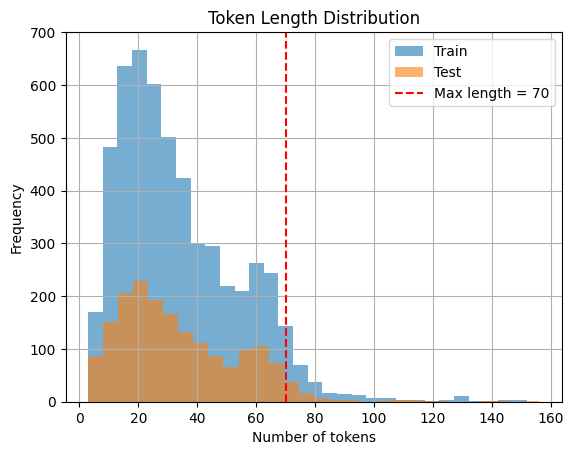

In [4]:
from datasets import Dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

train_dataset = Dataset.from_pandas(train_df[['Text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['Text', 'label']])

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

train_token_lengths = train_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))
test_token_lengths = test_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))

print("Train token length stats:")
print(train_token_lengths.describe())
print("\nTest token length stats:")
print(test_token_lengths.describe())

suggested_max_len = int(train_token_lengths.quantile(0.95))
print(f"\nSuggested max_length (95th percentile): {suggested_max_len}")

plt.hist(train_token_lengths, bins=30, alpha=0.6, label='Train')
plt.hist(test_token_lengths, bins=30, alpha=0.6, label='Test')
plt.axvline(suggested_max_len, color='red', linestyle='--', label=f'Max length = {suggested_max_len}')
plt.title("Token Length Distribution")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def tokenize_function(example):
    return tokenizer(example['Text'], truncation=True, padding='max_length', max_length=74)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 1785/1785 [00:00<00:00, 38504.59 examples/s]


In [6]:
from transformers.models.modernbert import ModernBertForSequenceClassification

model = ModernBertForSequenceClassification.from_pretrained(
    './modernbert-br/checkpoint-60000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at ./modernbert-br/checkpoint-60000 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1321363/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.726500
20,0.677100
30,0.628500
40,0.584400
50,0.593600
60,0.555600
70,0.537200
80,0.558700
90,0.510000
100,0.475700


TrainOutput(global_step=252, training_loss=0.48367339751077076, metrics={'train_runtime': 64.3785, 'train_samples_per_second': 249.4, 'train_steps_per_second': 3.914, 'total_flos': 790760527728192.0, 'train_loss': 0.48367339751077076, 'epoch': 3.0})

In [8]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.7894

Classification Report:
              precision    recall  f1-score   support

     against       0.79      0.78      0.79       885
         for       0.79      0.80      0.79       900

    accuracy                           0.79      1785
   macro avg       0.79      0.79      0.79      1785
weighted avg       0.79      0.79      0.79      1785



In [9]:
from transformers.models.bert import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    './bert-br/checkpoint-75000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./bert-br/checkpoint-75000 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1321363/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.627100
20,0.506200
30,0.489100
40,0.443800
50,0.472800
60,0.460400
70,0.443900
80,0.483600
90,0.426900
100,0.369900


TrainOutput(global_step=252, training_loss=0.37816621871694683, metrics={'train_runtime': 45.5061, 'train_samples_per_second': 352.832, 'train_steps_per_second': 5.538, 'total_flos': 610573870624320.0, 'train_loss': 0.37816621871694683, 'epoch': 3.0})

In [ ]:
# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.8291

Classification Report:
              precision    recall  f1-score   support

     against       0.83      0.83      0.83       885
         for       0.83      0.83      0.83       900

    accuracy                           0.83      1785
   macro avg       0.83      0.83      0.83      1785
weighted avg       0.83      0.83      0.83      1785



: 